In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
y = df[['species']].values
# y

In [0]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
le.inverse_transform([0, 2, 1])

array(['setosa', 'virginica', 'versicolor'], dtype=object)

In [0]:
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
X = df.drop('species',axis=1).values

In [0]:
import numpy as np
Y = np.eye(3)[y]
# Y

In [0]:
Y = np.squeeze(Y)
# Y

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
model = Sequential()
model.add(Dense(50,input_dim=4,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [22]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [0]:
history = model.fit(X_train,y_train,epochs=200, validation_split = 0.3)

In [24]:
loss,accuracy = model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 78us/step


In [25]:
print(accuracy)

0.9555555568801032


In [26]:
model.predict(np.array([[5.1,3.5,1.4,0.2]]))

array([[9.999926e-01, 7.385534e-06, 5.965489e-13]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

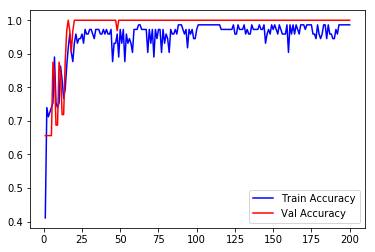

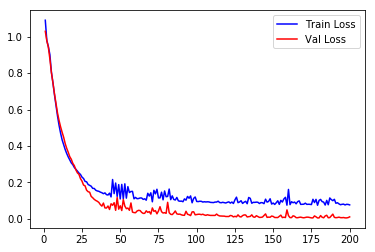

In [29]:
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Val Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

# Mnist

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Step 1:Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test,10)

11493376/11490434 [==============================] - 0s 0us/step


In [32]:
# Step 2: Build the Model
model = Sequential()
model.add(Dense(256,input_dim=784,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
Total params: 868,106
Trainable params: 868,106
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Step 3: Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
# Step 4: Train the Model
model.fit(X_train,y_train,epochs=2,batch_size=100)

Epoch 1/2
60000/60000 [==============================] - 15s 252us/step - loss: 0.2200 - acc: 0.9349
Epoch 2/2
60000/60000 [==============================] - 15s 246us/step - loss: 0.0857 - acc: 0.9732


In [37]:
# Step 5: Evaluate the Model
loss,accuracy = model.evaluate(X_test,y_test)
print("Loss = ",loss)
print("Accuracy ",accuracy)

10000/10000 [==============================] - 1s 92us/step
Loss =  0.10677297469852493
Accuracy  0.9651


In [0]:
# Step 6: Save the Model
model.save('mnist_nn.h5')

# Predict Single Image

In [39]:
import numpy as np
index = np.random.randint(1,10000)
X = X_test[index].reshape([-1,784])
prediction = model.predict(X)
print("Predicted Digit : ", prediction.argmax(axis=1))

Predicted Digit :  [6]


In [0]:
import matplotlib.pyplot as plt
def show_digit(index):
    label = y_test[index].argmax(axis=0)
    image = X_test[index].reshape([28,28])
    plt.title('Actual Digit : {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

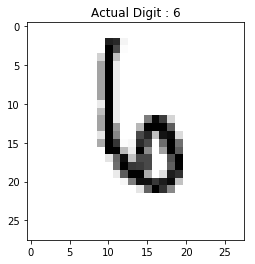

In [41]:
show_digit(index)